In [124]:
import pandas as pd
import numpy as np

In [125]:
trek_data = pd.read_csv("../Data/trekkers_df_with_bias.csv")
# drop data where Email-ID is duplicated
trek_data = trek_data.drop_duplicates(subset = "Email-ID")
# reset index
trek_data = trek_data.reset_index(drop = True)
trek_data["trekker_id"] = trek_data.index
# split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(trek_data, test_size = 0.2, random_state = 42)
trek_data = train
# drop nan rows
trek_data = trek_data.dropna()
trek_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
3941,zimmermatthaeus@speer.de,Prof. Alois Hornig B.Eng.,148,67,28,Male,Pune,Aundh,['Gujarati' 'English'],MIT-WPU,Student,Y,['Thursday' 'Sunday'],3,Easy,3941
2757,heringerol@web.de,Herr Eckehard Zirme MBA.,158,77,38,Male,Mumbai,Borivali,['Marathi' 'Hindi'],PCCOE,Unemployed,N,['Saturday' 'Friday' 'Sunday'],0,Medium,2757
4211,ansgarhoffmann@hermighausen.org,Ibrahim Schmidtke B.Eng.,142,55,43,Male,Nashik,Satpur,['English' 'Marathi'],PICT,Unemployed,Y,['Wednesday' 'Sunday' 'Thursday' 'Monday'],3,Hard,4211
4928,arenner@hotmail.de,Dr. Igor Junck MBA.,145,59,43,Female,Nashik,Panchavati,['English'],PCCOE,Student,Y,['Tuesday' 'Monday' 'Friday' 'Wednesday' 'Thur...,5,Medium,4928
99,truebkathleen@yahoo.de,Univ.Prof. Ilse Wilmsen,159,70,37,Female,Mumbai,Borivali,['Marathi' 'Hindi'],MIT-WPU,Student,Y,['Friday'],2,Easy,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,naumann@gmail.com,Dr. Oswald Graf,172,65,40,Male,Kolhapur,Kasaba Bawada,['Hindi'],MIT-ADT,Student,Y,['Friday' 'Saturday' 'Thursday' 'Wednesday' 'S...,2,Hard,4426
466,rennerviktoria@schacht.net,Walburga Bolander,171,72,44,Female,Pune,Aundh,['Marathi'],MIT-ADT,Working,N,['Friday' 'Sunday' 'Thursday'],0,Easy,466
3092,bbender@aol.de,Meta Reichmann,146,65,26,Male,Pune,Pimpri,['Hindi' 'English'],PCCOE,Working,Y,['Friday'],2,Easy,3092
3772,xwilmsen@gmail.com,Aribert Pölitz,149,96,40,Male,Pune,Shivaji Nagar,['Hindi' 'English' 'Marathi'],PICT,Working,Y,['Saturday' 'Sunday' 'Tuesday' 'Monday' 'Wedne...,2,Medium,3772


In [126]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# for categorical_data in ["Gender","City","Locality","Have you gone Trekking","Profession","college"]:
#     # use multi-label binarizer to convert categorical data to binary
#     mlb = MultiLabelBinarizer()
#     mlb.fit(trek_data[categorical_data])
#     # transform the data
#     transformed_data = mlb.transform(trek_data[categorical_data])
#     # create a dataframe from the transformed data
#     transformed_df = pd.DataFrame(transformed_data, columns = mlb.classes_)
#     # add the transformed data to the original dataframe
#     trek_data = pd.concat([trek_data, transformed_df], axis = 1)
#     # drop the original categorical data
#     trek_data = trek_data.drop(categorical_data, axis = 1)

# trek_data

In [127]:
# use pd.get_dummies to convert categorical data to binary
trek_data = pd.get_dummies(trek_data, columns = ["Gender","City","Locality","Have you gone Trekking","Profession","college"])
trek_data

,Email-ID,Name,Height,Weight,Age,Languages,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id,...,Have you gone Trekking_Y,Profession_Student,Profession_Unemployed,Profession_Working,college_MIT-ADT,college_MIT-WPU,college_PCCOE,college_PICT,college_SPPU,college_VIT
3941,zimmermatthaeus@speer.de,Prof. Alois Hornig B.Eng.,148,67,28,['Gujarati' 'English'],['Thursday' 'Sunday'],3,Easy,3941,...,1,1,0,0,0,1,0,0,0,0
2757,heringerol@web.de,Herr Eckehard Zirme MBA.,158,77,38,['Marathi' 'Hindi'],['Saturday' 'Friday' 'Sunday'],0,Medium,2757,...,0,0,1,0,0,0,1,0,0,0
4211,ansgarhoffmann@hermighausen.org,Ibrahim Schmidtke B.Eng.,142,55,43,['English' 'Marathi'],['Wednesday' 'Sunday' 'Thursday' 'Monday'],3,Hard,4211,...,1,0,1,0,0,0,0,1,0,0
4928,arenner@hotmail.de,Dr. Igor Junck MBA.,145,59,43,['English'],['Tuesday' 'Monday' 'Friday' 'Wednesday' 'Thur...,5,Medium,4928,...,1,1,0,0,0,0,1,0,0,0
99,truebkathleen@yahoo.de,Univ.Prof. Ilse Wilmsen,159,70,37,['Marathi' 'Hindi'],['Friday'],2,Easy,99,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,naumann@gmail.com,Dr. Oswald Graf,172,65,40,['Hindi'],['Friday' 'Saturday' 'Thursday' 'Wednesday' 'S...,2,Hard,4426,...,1,1,0,0,1,0,0,0,0,0
466,rennerviktoria@schacht.net,Walburga Bolander,171,72,44,['Marathi'],['Friday' 'Sunday' 'Thursday'],0,Easy,466,...,0,0,0,1,1,0,0,0,0,0
3092,bbender@aol.de,Meta Reichmann,146,65,26,['Hindi' 'English'],['Friday'],2,Easy,3092,...,1,0,0,1,0,0,1,0,0,0
3772,xwilmsen@gmail.com,Aribert Pölitz,149,96,40,['Hindi' 'English' 'Marathi'],['Saturday' 'Sunday' 'Tuesday' 'Monday' 'Wedne...,2,Medium,3772,...,1,0,0,1,0,0,0,1,0,0


In [128]:
# for difficulty level, we need to convert the data to numeric
trek_data["Difficulty of Trek"] = trek_data["Difficulty of Trek"].replace({"Easy":1,"Medium":2,"Hard":3})

In [129]:
trek_data.head()

,Email-ID,Name,Height,Weight,Age,Languages,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id,...,Have you gone Trekking_Y,Profession_Student,Profession_Unemployed,Profession_Working,college_MIT-ADT,college_MIT-WPU,college_PCCOE,college_PICT,college_SPPU,college_VIT
3941,zimmermatthaeus@speer.de,Prof. Alois Hornig B.Eng.,148,67,28,['Gujarati' 'English'],['Thursday' 'Sunday'],3,1,3941,...,1,1,0,0,0,1,0,0,0,0
2757,heringerol@web.de,Herr Eckehard Zirme MBA.,158,77,38,['Marathi' 'Hindi'],['Saturday' 'Friday' 'Sunday'],0,2,2757,...,0,0,1,0,0,0,1,0,0,0
4211,ansgarhoffmann@hermighausen.org,Ibrahim Schmidtke B.Eng.,142,55,43,['English' 'Marathi'],['Wednesday' 'Sunday' 'Thursday' 'Monday'],3,3,4211,...,1,0,1,0,0,0,0,1,0,0
4928,arenner@hotmail.de,Dr. Igor Junck MBA.,145,59,43,['English'],['Tuesday' 'Monday' 'Friday' 'Wednesday' 'Thur...,5,2,4928,...,1,1,0,0,0,0,1,0,0,0
99,truebkathleen@yahoo.de,Univ.Prof. Ilse Wilmsen,159,70,37,['Marathi' 'Hindi'],['Friday'],2,1,99,...,1,1,0,0,0,1,0,0,0,0


In [130]:
# Languages column is of type object
# convert it to a list
# remove [ and ] from the string
# split the string by comma

# replace ' with empty string
trek_data["Languages"] = trek_data["Languages"].str.replace("'","")
trek_data["Preferred Days"] = trek_data["Preferred Days"].str.replace("'","")

trek_data["Languages"] = trek_data["Languages"].apply(lambda x: (x[1:-1].split()))
trek_data["Preferred Days"] = trek_data["Preferred Days"].apply(lambda x: (x[1:-1].split()))

In [131]:
# dictionary of multipliers

multipliers = {
    "Age": 3,
    "Gender" : 2.5,
    "City" : 5,
    "Locality" : 1.5,
    "Have you gone Trekking" : 6,
    "Profession" : 1.5,
    "college" : 2.5,
    "Difficulty of Trek" : 5,
    "Languages" : 5,
    "Preferred Days" : 5,
    "BMI" : 1.25,
}

In [132]:
# apply multi-label binarizer for languages and preferred days



# fit the data
mlb.fit(trek_data["Languages"])


# transform the data
languages = mlb.transform(trek_data["Languages"])

# apply the multiplier
languages = languages * multipliers["Languages"]

# use same index as original dataframe
languages = pd.DataFrame(languages, index = trek_data.index)

# drop the column "Other" if it exists
if "Other" in languages.columns:
    languages = languages.drop("Other",axis = 1)

languages

,0,1,2,3
3941,5,5,0,0
2757,0,0,5,5
4211,5,0,0,5
4928,5,0,0,0
99,0,0,5,5
...,...,...,...,...
4426,0,0,5,0
466,0,0,0,5
3092,5,0,5,0
3772,5,0,5,5


In [133]:
# apply multi-label binarizer for preferred days
# fit the data
mlb.fit(trek_data["Preferred Days"])

# transform the data
preferred_days = mlb.transform(trek_data["Preferred Days"])

# apply the multiplier
preferred_days = preferred_days * multipliers["Preferred Days"]

# convert the array to a dataframe
preferred_days = pd.DataFrame(preferred_days,columns = mlb.classes_)
# drop the column "Other" if it exists
if "Other" in preferred_days.columns:
    preferred_days = preferred_days.drop("Other",axis = 1)

# use same index as original dataframe
preferred_days = preferred_days.set_index(trek_data.index)

preferred_days

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3941,0,0,0,5,5,0,0
2757,5,0,5,5,0,0,0
4211,0,5,0,5,5,0,5
4928,5,5,0,0,5,5,5
99,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
4426,5,0,5,5,5,0,5
466,5,0,0,5,5,0,0
3092,5,0,0,0,0,0,0
3772,0,5,5,5,0,5,5


In [134]:
# merge the dataframes
trek_data = pd.concat([trek_data,languages,preferred_days],axis = 1)

# drop the columns Languages and Preferred Days
trek_data = trek_data.drop(["Languages","Preferred Days"],axis = 1)

trek_data

,Email-ID,Name,Height,Weight,Age,Number of Treks,Difficulty of Trek,trekker_id,Gender_Female,Gender_Male,...,1,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3941,zimmermatthaeus@speer.de,Prof. Alois Hornig B.Eng.,148,67,28,3,1,3941,0,1,...,5,0,0,0,0,0,5,5,0,0
2757,heringerol@web.de,Herr Eckehard Zirme MBA.,158,77,38,0,2,2757,0,1,...,0,5,5,5,0,5,5,0,0,0
4211,ansgarhoffmann@hermighausen.org,Ibrahim Schmidtke B.Eng.,142,55,43,3,3,4211,0,1,...,0,0,5,0,5,0,5,5,0,5
4928,arenner@hotmail.de,Dr. Igor Junck MBA.,145,59,43,5,2,4928,1,0,...,0,0,0,5,5,0,0,5,5,5
99,truebkathleen@yahoo.de,Univ.Prof. Ilse Wilmsen,159,70,37,2,1,99,1,0,...,0,5,5,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,naumann@gmail.com,Dr. Oswald Graf,172,65,40,2,3,4426,0,1,...,0,5,0,5,0,5,5,5,0,5
466,rennerviktoria@schacht.net,Walburga Bolander,171,72,44,0,1,466,1,0,...,0,0,5,5,0,0,5,5,0,0
3092,bbender@aol.de,Meta Reichmann,146,65,26,2,1,3092,0,1,...,0,5,0,5,0,0,0,0,0,0
3772,xwilmsen@gmail.com,Aribert Pölitz,149,96,40,2,2,3772,0,1,...,0,5,5,0,5,5,5,0,5,5


In [135]:
trek_data

,Email-ID,Name,Height,Weight,Age,Number of Treks,Difficulty of Trek,trekker_id,Gender_Female,Gender_Male,...,1,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3941,zimmermatthaeus@speer.de,Prof. Alois Hornig B.Eng.,148,67,28,3,1,3941,0,1,...,5,0,0,0,0,0,5,5,0,0
2757,heringerol@web.de,Herr Eckehard Zirme MBA.,158,77,38,0,2,2757,0,1,...,0,5,5,5,0,5,5,0,0,0
4211,ansgarhoffmann@hermighausen.org,Ibrahim Schmidtke B.Eng.,142,55,43,3,3,4211,0,1,...,0,0,5,0,5,0,5,5,0,5
4928,arenner@hotmail.de,Dr. Igor Junck MBA.,145,59,43,5,2,4928,1,0,...,0,0,0,5,5,0,0,5,5,5
99,truebkathleen@yahoo.de,Univ.Prof. Ilse Wilmsen,159,70,37,2,1,99,1,0,...,0,5,5,5,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,naumann@gmail.com,Dr. Oswald Graf,172,65,40,2,3,4426,0,1,...,0,5,0,5,0,5,5,5,0,5
466,rennerviktoria@schacht.net,Walburga Bolander,171,72,44,0,1,466,1,0,...,0,0,5,5,0,0,5,5,0,0
3092,bbender@aol.de,Meta Reichmann,146,65,26,2,1,3092,0,1,...,0,5,0,5,0,0,0,0,0,0
3772,xwilmsen@gmail.com,Aribert Pölitz,149,96,40,2,2,3772,0,1,...,0,5,5,0,5,5,5,0,5,5


In [136]:
# create BMI column
trek_data["BMI"] = trek_data["Weight"] / (trek_data["Height"] / 100) ** 2

In [137]:
# drop the columns that are not required 
trek_data = trek_data.drop(columns = ["Name", "Email-ID", "Weight", "Height","trekker_id"])

In [138]:
# dictionary of multipliers

multipliers = {
    "Age": 10,
    "Gender" : 3,
    "City" : 1.5,
    "Locality" : 1,
    "Have you gone Trekking" : 8,
    "Profession" : 4,
    "college" : 2,
    "Difficulty of Trek" : 2,
    "Languages" : 2,
    "Preferred Days" : 1,
    "BMI" : 4,
}

In [139]:
trek_data

,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI
3941,28,3,1,0,1,0,0,0,0,1,...,0,0,0,0,0,5,5,0,0,30.588020
2757,38,0,2,0,1,0,1,0,0,0,...,5,5,5,0,5,5,0,0,0,30.844416
4211,43,3,3,0,1,0,0,0,1,0,...,0,5,0,5,0,5,5,0,5,27.276334
4928,43,5,2,1,0,0,0,0,1,0,...,0,0,5,5,0,0,5,5,5,28.061831
99,37,2,1,1,0,0,1,0,0,0,...,5,5,5,0,0,0,0,0,0,27.688778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,40,2,3,0,1,1,0,0,0,0,...,5,0,5,0,5,5,5,0,5,21.971336
466,44,0,1,1,0,0,0,0,0,1,...,0,5,5,0,0,5,5,0,0,24.622961
3092,26,2,1,0,1,0,0,0,0,1,...,5,0,5,0,0,0,0,0,0,30.493526
3772,40,2,2,0,1,0,0,0,0,1,...,5,5,0,5,5,5,0,5,5,43.241295


In [140]:
# apply the multipliers
for column in trek_data.columns:
    if column in multipliers:
        trek_data[column] = trek_data[column] * multipliers[column.split("_")[0]]

In [141]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler

# create a min-max scaler object
scaler = MinMaxScaler()

# fit and transform the data
trek_data[["Age", "BMI"]] = scaler.fit_transform(trek_data[["Age", "BMI"]])

trek_data

,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,2,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI
3941,0.281250,3,2,0,1,0,0,0,0,1,...,0,0,0,0,0,5,5,0,0,0.433436
2757,0.437500,0,4,0,1,0,1,0,0,0,...,5,5,5,0,5,5,0,0,0,0.440198
4211,0.515625,3,6,0,1,0,0,0,1,0,...,0,5,0,5,0,5,5,0,5,0.346098
4928,0.515625,5,4,1,0,0,0,0,1,0,...,0,0,5,5,0,0,5,5,5,0.366813
99,0.421875,2,2,1,0,0,1,0,0,0,...,5,5,5,0,0,0,0,0,0,0.356975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.468750,2,6,0,1,1,0,0,0,0,...,5,0,5,0,5,5,5,0,5,0.206191
466,0.531250,0,2,1,0,0,0,0,0,1,...,0,5,5,0,0,5,5,0,0,0.276121
3092,0.250000,2,2,0,1,0,0,0,0,1,...,5,0,5,0,0,0,0,0,0,0.430944
3772,0.468750,2,4,0,1,0,0,0,0,1,...,5,5,0,5,5,5,0,5,5,0.767137


In [142]:
import matplotlib.pyplot as plt

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jx

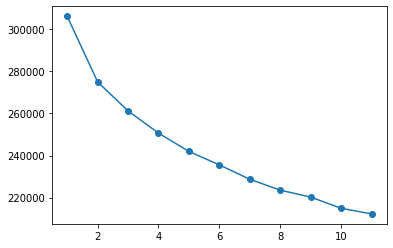

In [143]:
from sklearn.cluster import KMeans
inertias =[]
Krange = range(1,12)

for c in Krange:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(trek_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(Krange,inertias, marker='o')


/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jx

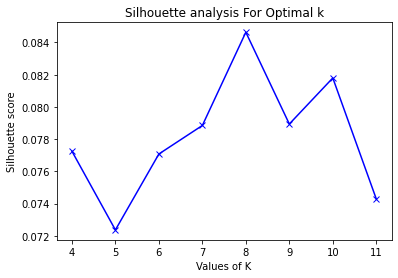

In [144]:
from sklearn.metrics import silhouette_score
silhouette_avg = []
Krange = range(4,12)
for num_clusters in Krange:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(trek_data)
    silhouette_avg.append(silhouette_score(trek_data, kmeans.labels_))

plt.figure()
plt.plot(Krange,silhouette_avg,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

In [145]:
from sklearn.cluster import KMeans

# create a kmeans object
kmeans = KMeans(n_clusters = 5)

# fit the data
kmeans.fit(trek_data)

# get the cluster labels
labels = kmeans.predict(trek_data)

# get the cluster centroids
centroids = kmeans.cluster_centers_

# create a new column in the dataframe
trek_data["cluster"] = labels

trek_data

/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/jxtin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI,cluster
3941,0.281250,3,2,0,1,0,0,0,0,1,...,0,0,0,0,5,5,0,0,0.433436,0
2757,0.437500,0,4,0,1,0,1,0,0,0,...,5,5,0,5,5,0,0,0,0.440198,3
4211,0.515625,3,6,0,1,0,0,0,1,0,...,5,0,5,0,5,5,0,5,0.346098,4
4928,0.515625,5,4,1,0,0,0,0,1,0,...,0,5,5,0,0,5,5,5,0.366813,1
99,0.421875,2,2,1,0,0,1,0,0,0,...,5,5,0,0,0,0,0,0,0.356975,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.468750,2,6,0,1,1,0,0,0,0,...,0,5,0,5,5,5,0,5,0.206191,4
466,0.531250,0,2,1,0,0,0,0,0,1,...,5,5,0,0,5,5,0,0,0.276121,0
3092,0.250000,2,2,0,1,0,0,0,0,1,...,0,5,0,0,0,0,0,0,0.430944,2
3772,0.468750,2,4,0,1,0,0,0,0,1,...,5,0,5,5,5,0,5,5,0.767137,1


In [146]:
# show random records from each cluster
trek_data.groupby("cluster").sample(5)

,Age,Number of Treks,Difficulty of Trek,Gender_Female,Gender_Male,City_Kolhapur,City_Mumbai,City_Nagpur,City_Nashik,City_Pune,...,3,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BMI,cluster
4062,0.531250,0,4,0,1,0,1,0,0,0,...,0,0,5,0,5,0,5,0,0.311634,0
479,0.187500,0,6,0,1,0,0,0,1,0,...,5,0,0,0,5,5,0,5,0.224254,0
3437,0.093750,4,4,0,1,0,1,0,0,0,...,0,0,0,0,5,0,5,0,0.322202,0
1821,0.515625,1,6,1,0,1,0,0,0,0,...,0,5,0,0,5,0,5,0,0.186071,0
1752,0.421875,5,4,1,0,0,0,1,0,0,...,5,0,5,0,5,5,0,0,0.450352,0
1653,0.421875,5,4,1,0,1,0,0,0,0,...,5,5,5,0,5,5,5,5,0.131537,1
569,0.421875,2,2,1,0,0,0,0,1,0,...,5,0,5,5,5,0,5,0,0.252834,1
3023,0.390625,3,2,0,1,0,0,0,0,1,...,0,5,5,0,0,5,5,5,0.099216,1
995,0.390625,0,2,0,1,0,0,0,1,0,...,5,5,5,5,0,5,5,5,0.434523,1
4944,0.453125,5,6,1,0,0,0,0,0,1,...,5,5,5,0,0,5,5,5,0.217135,1


In [147]:
# show details of the clusters
trek_data.groupby("cluster").describe()

Age                                                         \
          count      mean       std  min       25%       50%       75%   
cluster                                                                  
0         628.0  0.316556  0.139152  0.0  0.218750  0.312500  0.406250   
1        1062.0  0.314766  0.149030  0.0  0.203125  0.312500  0.406250   
2         620.0  0.311139  0.145500  0.0  0.203125  0.296875  0.406250   
3         826.0  0.307109  0.145904  0.0  0.203125  0.312500  0.406250   
4         860.0  0.313427  0.151195  0.0  0.203125  0.296875  0.421875   

                  Number of Treks            ... Wednesday          BMI  \
              max           count      mean  ...       75%  max   count   
cluster                                      ...                          
0        0.812500           628.0  2.154459  ...       0.0  5.0   628.0   
1        0.828125          1062.0  2.230697  ...       5.0  5.0  1062.0   
2        0.812500           620.0  2.191935  ...       5.0  5.0   620.0   
3        0.812500           826.0  2.191283  ...       0.0  5.0   826.0   
4        1.000000           860.0  2.377907  ...       5.0  5.0   860.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
cluster                                                                        
0        0.355978  0.145234  0.002664  0.257265  0.343868  0.443316  0.933926  
1        0.353933  0.138621  0.023912  0.262019  0.341705  0.440430  0.780749  
2        0.358579  0.141413  0.023801  0.260199  0.350254  0.437310  0.863253  
3        0.345611  0.137514  0.009873  0.244453  0.337130  0.429065  1.000000  
4        0.353012  0.143668  0.000000  0.257263  0.335970  0.438347  0.989677  

[5 rows x 464 columns]

In [148]:
og_data = pd.read_csv("../Data/trekkers_df_with_bias.csv")
# drop data where Email-ID is duplicated
og_data = og_data.drop_duplicates(subset = "Email-ID")
# reset index
og_data = og_data.reset_index(drop = True)
og_data["trekker_id"] = og_data.index
# split languages and preferred days
og_data["Languages"] = og_data["Languages"].str.replace("'","")
og_data["Preferred Days"] = og_data["Preferred Days"].str.replace("'","")

og_data["Languages"] = og_data["Languages"].apply(lambda x: (x[1:-1].split()))
og_data["Preferred Days"] = og_data["Preferred Days"].apply(lambda x: (x[1:-1].split()))

og_data

,Email-ID,Name,Height,Weight,Age,Gender,City,Locality,Languages,college,Profession,Have you gone Trekking,Preferred Days,Number of Treks,Difficulty of Trek,trekker_id
0,kaestergerold@loechel.de,Marcella Pölitz,154,69,19,Female,Pune,Aundh,[English],MIT-ADT,Student,Y,"[Tuesday, Sunday, Saturday, Friday]",2,Hard,0
1,magaretevan-der-dussen@gmx.de,Marlis Koch II,156,75,35,Female,Kolhapur,D Ward,"[Hindi, Marathi]",MIT-WPU,Working,Y,[Saturday],2,Medium,1
2,tgertz@web.de,Heiderose Davids,162,82,40,Male,Kolhapur,Gadhinglaj,[English],PCCOE,Working,N,"[Friday, Sunday, Thursday, Saturday, Wednesday...",0,Hard,2
3,barthkunigunda@gmail.com,Justine Junken-Flantz,167,71,33,Male,Pune,Pimpri,[Marathi],MIT-ADT,Working,Y,"[Sunday, Saturday]",8,Easy,3
4,kmueller@dussen.com,Juliana Blümel,163,68,30,Male,Nashik,Sadar,"[English, Marathi]",PCCOE,Working,Y,"[Saturday, Sunday, Wednesday, Monday]",0,Easy,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,lzorbach@gmail.com,Ursel Scholtz MBA.,164,90,44,Female,Mumbai,Borivali,"[English, Gujarati, Marathi]",SPPU,Student,Y,[Saturday],8,Medium,4991
4992,wiektim@hess.com,Liesbeth Thanel B.A.,153,76,54,Male,Nashik,Sadar,"[Marathi, Gujarati, English]",MIT-WPU,Student,N,[Sunday],0,Easy,4992
4993,wsteinberg@web.de,Dr. Sandy Scholl,164,66,67,Female,Kolhapur,Gadhinglaj,"[Gujarati, English, Marathi]",MIT-WPU,Student,N,[Friday],0,Medium,4993
4994,ana63@weller.de,Jana Scheel,166,72,32,Female,Pune,Aundh,"[Hindi, Marathi]",PICT,Working,N,"[Tuesday, Thursday, Saturday, Monday, Sunday, ...",0,Hard,4994


In [149]:
# select random indices from each cluster
indices = trek_data.groupby("cluster").apply(lambda x: x.sample(10).index)
for each in indices:
    print(og_data.loc[each].to_markdown())

|      | Email-ID                 | Name                      |   Height |   Weight |   Age | Gender   | City     | Locality      | Languages                          | college   | Profession   | Have you gone Trekking   | Preferred Days                      |   Number of Treks | Difficulty of Trek   |   trekker_id |
|-----:|:-------------------------|:--------------------------|---------:|---------:|------:|:---------|:---------|:--------------|:-----------------------------------|:----------|:-------------|:-------------------------|:------------------------------------|------------------:|:---------------------|-------------:|
| 1462 | birger87@googlemail.com  | Mirella Dörschner         |      153 |       75 |    34 | Female   | Nagpur   | Bank Colony   | ['Gujarati', 'Hindi']              | MIT-ADT   | Student      | Y                        | ['Wednesday', 'Thursday', 'Sunday'] |                 4 | Hard                 |         1462 |
| 2923 | amandathies@bachmann.net | Songül 